## IMPORTS

In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("House_Rent_Dataset.csv")

In [506]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


### Exploratory Data Analysis

In [507]:
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [508]:
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [509]:
data['Floor'].nunique()


480

In [510]:
data['Area Locality'].nunique()

2235

In [511]:
data['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10], dtype=int64)

<Axes: xlabel='Bathroom', ylabel='Rent'>

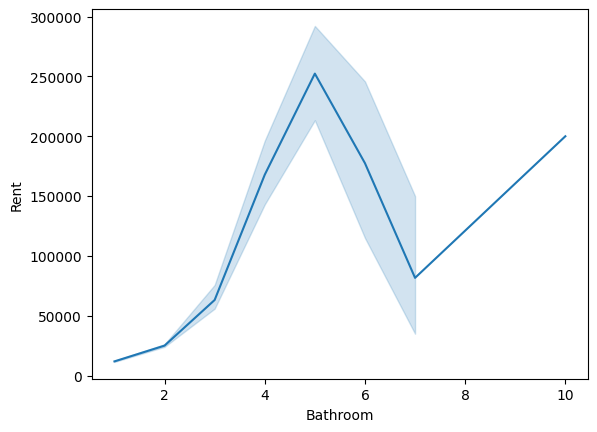

In [512]:
sns.lineplot(x='Bathroom', y='Rent', data=data)

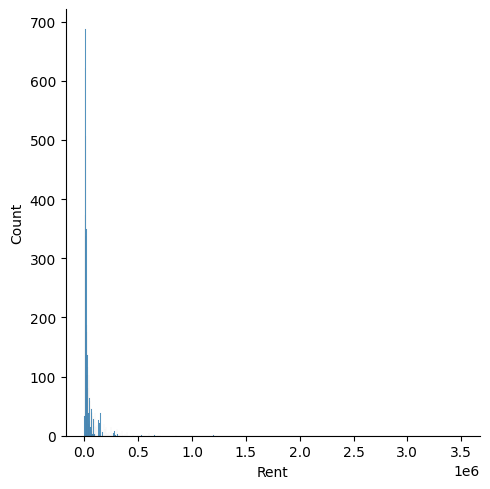

In [513]:
sns.displot(data['Rent'])

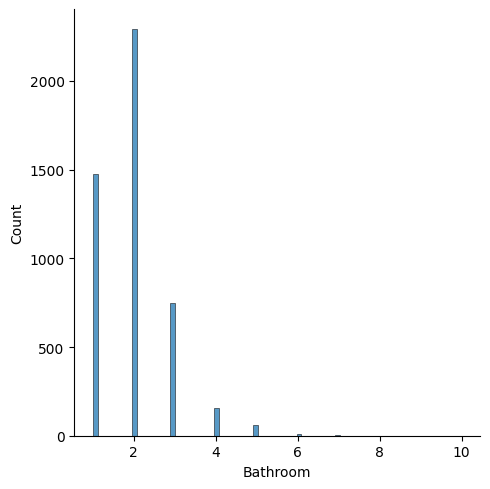

In [514]:
sns.displot(data['Bathroom'])

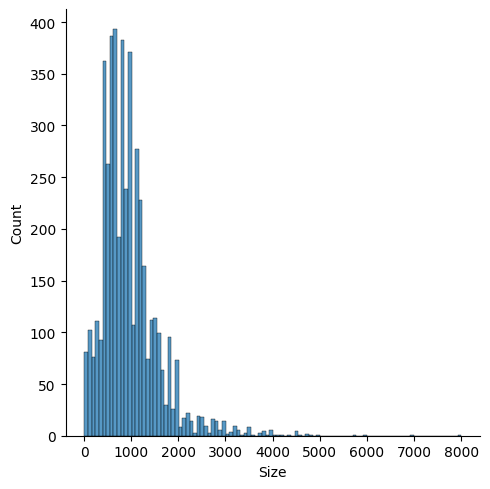

In [515]:
sns.displot(data['Size'])

## Preprocessing

### Data Cleaning

#### Feature Selection

In [516]:
data = data[['BHK',
             'Bathroom',
             'Furnishing Status',
             'Rent',
             'Size',
             'Floor',
             'Area Type',
             'Tenant Preferred',
             'Point of Contact',
             #'Area Locality',
             'City'
             ]]

#### Removing Rent Outliers

In [517]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[ (data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

data = remove_outliers(data, 'Rent')
#data = remove_outliers(data, 'BHK')
data = remove_outliers(data, 'Bathroom')
data = remove_outliers(data, 'Size')

#### Addressing Floor Column

In [518]:


data[['CurrentFloor', 'TotalFloors']] = data['Floor'].str.split(' out of ', expand=True)

data['CurrentFloor'] = data['CurrentFloor'].replace("Ground", 1)
data['CurrentFloor'] = data['CurrentFloor'].replace("Upper Basement", 0)
data['CurrentFloor'] = data['CurrentFloor'].replace("Lower Basement", -1)

data['CurrentFloor'] = pd.to_numeric(data['CurrentFloor'])
data['TotalFloors'] = pd.to_numeric(data['TotalFloors'])
data['CurrentFloor'] = data['CurrentFloor'] + 2
data['TotalFloors'] = data['TotalFloors'] + 2

data.dropna(inplace=True)


data.drop('Floor', axis=1, inplace=True)

#data['Floor'] = data['CurrentFloor'] / data['TotalFloors']
#data.drop(['CurrentFloor', 'TotalFloors'], axis=1, inplace=True) 


#### Pre-standardization Data Set

In [519]:
data

,BHK,Bathroom,Furnishing Status,Rent,Size,Area Type,Tenant Preferred,Point of Contact,City,CurrentFloor,TotalFloors
0,2,2,Unfurnished,10000,1100,Super Area,Bachelors/Family,Contact Owner,Kolkata,3,4.0
1,2,1,Semi-Furnished,20000,800,Super Area,Bachelors/Family,Contact Owner,Kolkata,3,5.0
2,2,1,Semi-Furnished,17000,1000,Super Area,Bachelors/Family,Contact Owner,Kolkata,3,5.0
3,2,1,Unfurnished,10000,800,Super Area,Bachelors/Family,Contact Owner,Kolkata,3,4.0
4,2,1,Unfurnished,7500,850,Carpet Area,Bachelors,Contact Owner,Kolkata,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...
4740,2,2,Unfurnished,12000,1350,Super Area,Bachelors/Family,Contact Owner,Hyderabad,4,4.0
4741,2,2,Semi-Furnished,15000,1000,Carpet Area,Bachelors/Family,Contact Owner,Hyderabad,5,7.0
4743,3,3,Semi-Furnished,35000,1750,Carpet Area,Bachelors/Family,Contact Agent,Hyderabad,5,7.0
4744,3,2,Semi-Furnished,45000,1500,Carpet Area,Family,Contact Agent,Hyderabad,25,36.0


### Encoding

#### One-hot Encoding

In [520]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Tenant Preferred')
data = one_hot_encode(data, 'Point of Contact')
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
#data = one_hot_encode(data, 'Area Locality')

### Train/Test Splitting

In [521]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 , random_state = 42)

### Standardization

In [522]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### PolynomialFeatures

In [523]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)


In [524]:
data

,BHK,Bathroom,Rent,Size,CurrentFloor,TotalFloors,Semi-Furnished,Unfurnished,Bachelors/Family,Family,Contact Builder,Contact Owner,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,2,10000,1100,3,4.0,False,True,True,False,False,True,False,True,False,False,False,True,False
1,2,1,20000,800,3,5.0,True,False,True,False,False,True,False,True,False,False,False,True,False
2,2,1,17000,1000,3,5.0,True,False,True,False,False,True,False,True,False,False,False,True,False
3,2,1,10000,800,3,4.0,False,True,True,False,False,True,False,True,False,False,False,True,False
4,2,1,7500,850,3,4.0,False,True,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,2,2,12000,1350,4,4.0,False,True,True,False,False,True,False,True,False,False,True,False,False
4741,2,2,15000,1000,5,7.0,True,False,True,False,False,True,True,False,False,False,True,False,False
4743,3,3,35000,1750,5,7.0,True,False,True,False,False,False,True,False,False,False,True,False,False
4744,3,2,45000,1500,25,36.0,True,False,False,True,False,False,True,False,False,False,True,False,False


## Modelling

In [526]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
model = linear_model.LinearRegression()

#Regularization
model = RidgeCV(alphas=[1]).fit(X_train, y_train)
#model = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
#model = ElasticNetCV(alphas=[1e-3, 1e-2, 1e-1, 1], l1_ratio=[0.1, 0.5, 0.7, 0.9]).fit(X_train, y_train)


# Evaluation

In [527]:
y_preds = model.predict(X_test)

In [528]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create a dataframe to store the results
results = pd.DataFrame({'Value': [round(mean_squared_error(y_test, y_preds), 2),
                                  round(r2_score(y_test, y_preds), 2)]},
                       index=['Mean Squared Error', 'Coefficient of Determination'])

# Display the dataframe
results


,Value
Mean Squared Error,44332760.02
Coefficient of Determination,0.76


In [529]:
train_r2 = model.score(X_train, y_train)
print("Training Coefficient of Determination: %.2f" % train_r2)


Training Coefficient of Determination: 0.75


### Qualitative Evaluation

In [530]:
sample_data = X.iloc[0]
sample_data

BHK                     2
Bathroom                2
Size                 1100
CurrentFloor            3
TotalFloors           4.0
Semi-Furnished      False
Unfurnished          True
Bachelors/Family     True
Family              False
Contact Builder     False
Contact Owner        True
Carpet Area         False
Super Area           True
Chennai             False
Delhi               False
Hyderabad           False
Kolkata              True
Mumbai              False
Name: 0, dtype: object

In [531]:
sample_data_standardized = poly.transform(X.iloc[0].values.reshape(1,-1))

In [532]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

870418379.1107713

In [533]:
y.iloc[0]

10000

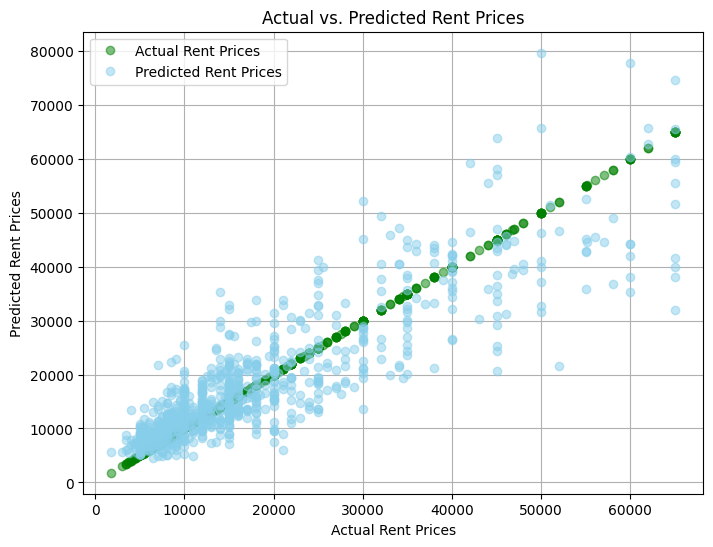

In [534]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()